In [2]:
%matplotlib inline


# Comparison of LDA and PCA 2D projection of Iris dataset

The Iris dataset represents 3 kind of Iris flowers (Setosa, Versicolour
and Virginica) with 4 attributes: sepal length, sepal width, petal length
and petal width.

Principal Component Analysis (PCA) applied to this data identifies the
combination of attributes (principal components, or directions in the
feature space) that account for the most variance in the data. Here we
plot the different samples on the 2 first principal components.

Linear Discriminant Analysis (LDA) tries to identify attributes that
account for the most variance *between classes*. In particular,
LDA, in contrast to PCA, is a supervised method, using known class labels.


explained variance ratio (first two components): [0.14890594 0.13618771]


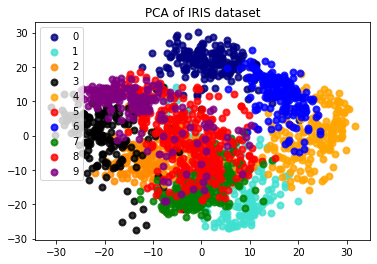

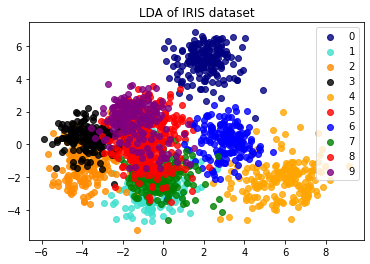

In [14]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# iris = datasets.load_iris()
digits = datasets.load_digits()

X = digits.data
y = digits.target
target_names = digits.target_names
# X = iris.data
# y = iris.target
# target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
# colors = ["navy", "turquoise", "darkorange"]
colors = ["navy", "turquoise", "darkorange", "black", "orange", "red", "blue", "green", "red", "purple"]
lw = 2

# for color, i, target_name in zip(colors, [0, 1, 2], target_names):
for color, i, target_name in zip(colors, digits["target_names"], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, digits["target_names"], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

In [15]:
digits = datasets.load_digits()

In [16]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [39]:
import umap
reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)
# UMAP(a=None, angular_rp_forest=False, b=None,
#      force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
#      local_connectivity=1.0, low_memory=False, metric='euclidean',
#      metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
#      n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
#      output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
#      set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
#      target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
#      transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

UMAP(random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [41]:
import numpy as np
embedding = reducer.transform(digits.data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(1797, 2)

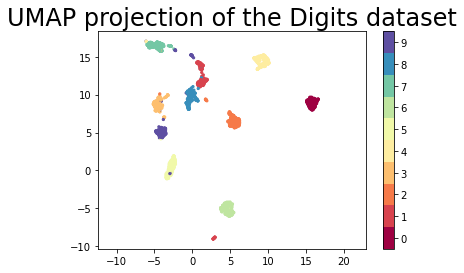

In [42]:
plt.figure()
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [9]:
import numpy as np
import umap
import matplotlib.pyplot as plt
MG1 = np.load("../data/distance_npz/filtered_sasdfb9_m1_10_MG.npz")["arr_0"]
MG2 = np.load("../data/distance_npz/filtered_sasdfb9_m1_20_MG.npz")["arr_0"]
MG3 = np.load("../data/distance_npz/filtered_sasdfb9_m1_30_MG.npz")["arr_0"]
MG4 = np.load("../data/distance_npz/filtered_sasdfb9_m1_40_MG.npz")["arr_0"]
MG5 = np.load("../data/distance_npz/filtered_sasdfb9_m1_50_MG.npz")["arr_0"]
NA1 = np.load("../data/distance_npz/filtered_sasdfb9_m1_10_Na+.npz")["arr_0"]
NA2 = np.load("../data/distance_npz/filtered_sasdfb9_m1_20_Na+.npz")["arr_0"]
NA3 = np.load("../data/distance_npz/filtered_sasdfb9_m1_30_Na+.npz")["arr_0"]
NA4 = np.load("../data/distance_npz/filtered_sasdfb9_m1_40_Na+.npz")["arr_0"]
NA5 = np.load("../data/distance_npz/filtered_sasdfb9_m1_50_Na+.npz")["arr_0"]
n_snapshot = MG1.shape[0]
flattened_MG1 = MG1.reshape(n_snapshot, -1)
flattened_MG2 = MG2.reshape(n_snapshot, -1)
flattened_MG3 = MG3.reshape(n_snapshot, -1)
flattened_MG4 = MG4.reshape(n_snapshot, -1)
flattened_MG5 = MG5.reshape(n_snapshot, -1)
flattened_NA1 = NA1.reshape(n_snapshot, -1)
flattened_NA2 = NA2.reshape(n_snapshot, -1)
flattened_NA3 = NA3.reshape(n_snapshot, -1)
flattened_NA4 = NA4.reshape(n_snapshot, -1)
flattened_NA5 = NA5.reshape(n_snapshot, -1)
md_data = np.vstack([
    flattened_MG1, flattened_MG2, flattened_MG3, flattened_MG4, flattened_MG5,
    flattened_NA1, flattened_NA2, flattened_NA3, flattened_NA4, flattened_NA5]
)
md_target = np.array(
    [0 for _ in range(n_snapshot)] +
    [1 for _ in range(n_snapshot)] +
    [2 for _ in range(n_snapshot)] +
    [3 for _ in range(n_snapshot)] +
    [4 for _ in range(n_snapshot)] +
    [5 for _ in range(n_snapshot)] +|
    [6 for _ in range(n_snapshot)] +
    [7 for _ in range(n_snapshot)] +
    [8 for _ in range(n_snapshot)] +
    [9 for _ in range(n_snapshot)]
)
md_reducer = umap.UMAP(random_state=42)
md_reducer.fit(md_data)
md_embedding = md_reducer.transform(md_data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(md_embedding == md_reducer.embedding_))
md_embedding.shape
plt.figure()
plt.scatter(md_embedding[:, 0], md_embedding[:, 1], c=md_target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the MD dataset', fontsize=24);

In [4]:
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()
tfk = tf.keras
from train_ssRNA_VAE import define_model
encoded_size = 64
base_depth=32
input_shape = MG1.shape[1:]
vae, encoder, decoder = define_model(input_shape, encoded_size, base_depth)
load_status = vae.load_weights("trained_model/encoded64_m1_ssRNA_distributed100atoms")

101/101 [==============================] - 1s 12ms/step


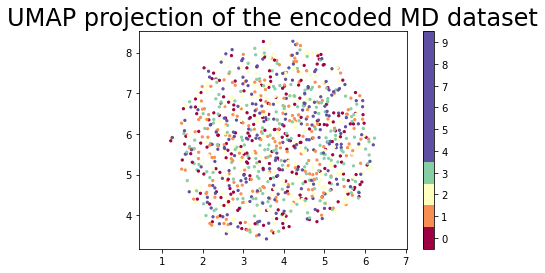

In [11]:
def _preprocess(sample):
  ndarray = tf.cast(sample, tf.float32) / 255.  # Scale to unit interval.
  return ndarray, ndarray
tf_MG1 = tf.data.Dataset.from_tensor_slices(MG1).map(_preprocess).batch(1)
tf_MG2 = tf.data.Dataset.from_tensor_slices(MG2).map(_preprocess).batch(1)
tf_MG3 = tf.data.Dataset.from_tensor_slices(MG3).map(_preprocess).batch(1)
tf_MG4 = tf.data.Dataset.from_tensor_slices(MG4).map(_preprocess).batch(1)
tf_MG5 = tf.data.Dataset.from_tensor_slices(MG5).map(_preprocess).batch(1)
tf_NA1 = tf.data.Dataset.from_tensor_slices(NA1).map(_preprocess).batch(1)
tf_NA2 = tf.data.Dataset.from_tensor_slices(NA2).map(_preprocess).batch(1)
tf_NA3 = tf.data.Dataset.from_tensor_slices(NA3).map(_preprocess).batch(1)
tf_NA4 = tf.data.Dataset.from_tensor_slices(NA4).map(_preprocess).batch(1)
tf_NA5 = tf.data.Dataset.from_tensor_slices(NA5).map(_preprocess).batch(1)
encoded_MG1 = encoder.predict(tf_MG1)
encoded_MG2 = encoder.predict(tf_MG2)
encoded_MG3 = encoder.predict(tf_MG3)
encoded_MG4 = encoder.predict(tf_MG4)
encoded_MG5 = encoder.predict(tf_MG5)
encoded_NA1 = encoder.predict(tf_NA1)
encoded_NA2 = encoder.predict(tf_NA2)
encoded_NA3 = encoder.predict(tf_NA3)
encoded_NA4 = encoder.predict(tf_NA4)
encoded_NA5 = encoder.predict(tf_NA5)
encoded_md_data = np.vstack([
    encoded_MG1, encoded_MG2, encoded_MG3, encoded_MG4, encoded_MG5,
    encoded_NA1, encoded_NA2, encoded_NA3, encoded_NA4, encoded_NA5]
)
n_snapshot = MG1.shape[0]
encoded_md_target = np.array(
    [0 for _ in range(n_snapshot)] +
    [1 for _ in range(n_snapshot)] +
    [2 for _ in range(n_snapshot)] +
    [3 for _ in range(n_snapshot)] +
    [4 for _ in range(n_snapshot)] +
    [0 for _ in range(n_snapshot)] +
    [1 for _ in range(n_snapshot)] +
    [2 for _ in range(n_snapshot)] +
    [3 for _ in range(n_snapshot)] +
    [4 for _ in range(n_snapshot)]
)
encoded_md_reducer = umap.UMAP(random_state=42)
encoded_md_reducer.fit(encoded_md_data)
encoded_md_embedding = encoded_md_reducer.transform(encoded_md_data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(encoded_md_embedding == encoded_md_reducer.embedding_))
plt.figure()
plt.scatter(encoded_md_embedding[:, 0], encoded_md_embedding[:, 1], c=encoded_md_target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the encoded MD dataset', fontsize=24);

In [39]:
def _preprocess(sample):
  ndarray = tf.cast(sample, tf.float32) / 255.  # Scale to unit interval.
  return ndarray, ndarray
tf_MG1 = tf.data.Dataset.from_tensor_slices(MG1).map(_preprocess).batch(1)
tf_MG2 = tf.data.Dataset.from_tensor_slices(MG2).map(_preprocess).batch(1)
tf_MG3 = tf.data.Dataset.from_tensor_slices(MG3).map(_preprocess).batch(1)
tf_MG4 = tf.data.Dataset.from_tensor_slices(MG4).map(_preprocess).batch(1)
tf_MG5 = tf.data.Dataset.from_tensor_slices(MG5).map(_preprocess).batch(1)
tf_NA1 = tf.data.Dataset.from_tensor_slices(NA1).map(_preprocess).batch(1)
tf_NA2 = tf.data.Dataset.from_tensor_slices(NA2).map(_preprocess).batch(1)
tf_NA3 = tf.data.Dataset.from_tensor_slices(NA3).map(_preprocess).batch(1)
tf_NA4 = tf.data.Dataset.from_tensor_slices(NA4).map(_preprocess).batch(1)
tf_NA5 = tf.data.Dataset.from_tensor_slices(NA5).map(_preprocess).batch(1)
decoded_MG1 = vae.predict(tf_MG1)
decoded_MG2 = vae.predict(tf_MG2)
decoded_MG3 = vae.predict(tf_MG3)
decoded_MG4 = vae.predict(tf_MG4)
decoded_MG5 = vae.predict(tf_MG5)
decoded_NA1 = vae.predict(tf_NA1)
decoded_NA2 = vae.predict(tf_NA2)
decoded_NA3 = vae.predict(tf_NA3)
decoded_NA4 = vae.predict(tf_NA4)
decoded_NA5 = vae.predict(tf_NA5)
n_decoded_snapshot = decoded_MG1.shape[0]
flattened_decoded_MG1 = decoded_MG1.reshape(n_snapshot, -1)
flattened_decoded_MG2 = decoded_MG2.reshape(n_snapshot, -1)
flattened_decoded_MG3 = decoded_MG3.reshape(n_snapshot, -1)
flattened_decoded_MG4 = decoded_MG4.reshape(n_snapshot, -1)
flattened_decoded_MG5 = decoded_MG5.reshape(n_snapshot, -1)
flattened_decoded_NA1 = decoded_NA1.reshape(n_snapshot, -1)
flattened_decoded_NA2 = decoded_NA2.reshape(n_snapshot, -1)
flattened_decoded_NA3 = decoded_NA3.reshape(n_snapshot, -1)
flattened_decoded_NA4 = decoded_NA4.reshape(n_snapshot, -1)
flattened_decoded_NA5 = decoded_NA5.reshape(n_snapshot, -1)

101/101 [==============================] - 2s 15ms/step


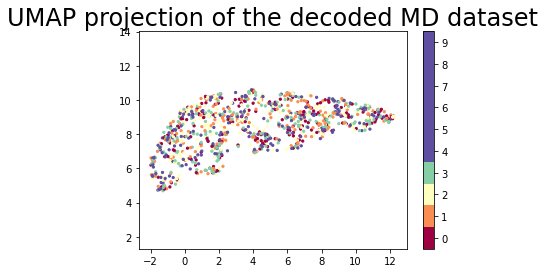

In [42]:
decoded_md_data = np.vstack([
    flattened_decoded_MG1, flattened_decoded_MG2, flattened_decoded_MG3, flattened_decoded_MG4, flattened_decoded_MG5,
    flattened_decoded_NA1, flattened_decoded_NA2, flattened_decoded_NA3, flattened_decoded_NA4, flattened_decoded_NA5]
)
decoded_md_target = np.array(
    [0 for _ in range(n_snapshot)] +
    [1 for _ in range(n_snapshot)] +
    [2 for _ in range(n_snapshot)] +
    [3 for _ in range(n_snapshot)] +
    [4 for _ in range(n_snapshot)] +
    [0 for _ in range(n_snapshot)] +
    [1 for _ in range(n_snapshot)] +
    [2 for _ in range(n_snapshot)] +
    [3 for _ in range(n_snapshot)] +
    [4 for _ in range(n_snapshot)]
)
decoded_md_reducer = umap.UMAP(random_state=42)
decoded_md_reducer.fit(decoded_md_data)
decoded_md_embedding = decoded_md_reducer.transform(decoded_md_data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(decoded_md_embedding == decoded_md_reducer.embedding_))
plt.figure()
plt.scatter(decoded_md_embedding[:, 0], decoded_md_embedding[:, 1], c=decoded_md_target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the decoded MD dataset', fontsize=24);

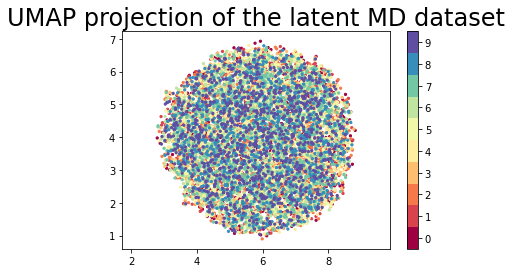

In [20]:
# latent_MG1 = np.load("../results/small_labelled_ssRNA_trained30epoch_latent_space/filtered_sasdfb9_m1_10_MG.npz")["arr_0"]
# latent_MG2 = np.load("../results/small_labelled_ssRNA_trained30epoch_latent_space/filtered_sasdfb9_m1_20_MG.npz")["arr_0"]
# latent_MG3 = np.load("../results/small_labelled_ssRNA_trained30epoch_latent_space/filtered_sasdfb9_m1_30_MG.npz")["arr_0"]
# latent_MG4 = np.load("../results/small_labelled_ssRNA_trained30epoch_latent_space/filtered_sasdfb9_m1_40_MG.npz")["arr_0"]
# latent_MG5 = np.load("../results/small_labelled_ssRNA_trained30epoch_latent_space/filtered_sasdfb9_m1_50_MG.npz")["arr_0"]
# latent_NA1 = np.load("../results/small_labelled_ssRNA_trained30epoch_latent_space/filtered_sasdfb9_m1_10_Na+.npz")["arr_0"]
# latent_NA2 = np.load("../results/small_labelled_ssRNA_trained30epoch_latent_space/filtered_sasdfb9_m1_20_Na+.npz")["arr_0"]
# latent_NA3 = np.load("../results/small_labelled_ssRNA_trained30epoch_latent_space/filtered_sasdfb9_m1_30_Na+.npz")["arr_0"]
# latent_NA4 = np.load("../results/small_labelled_ssRNA_trained30epoch_latent_space/filtered_sasdfb9_m1_40_Na+.npz")["arr_0"]
# latent_NA5 = np.load("../results/small_labelled_ssRNA_trained30epoch_latent_space/filtered_sasdfb9_m1_50_Na+.npz")["arr_0"]
# n_snapshot = latent_MG1.shape[0]

latent_md_data = np.vstack([
    latent_MG1, latent_MG2, latent_MG3, latent_MG4, latent_MG5,
    latent_NA1, latent_NA2, latent_NA3, latent_NA4, latent_NA5]
)
latent_md_target = np.array(
    [0 for _ in range(n_snapshot)] +
    [1 for _ in range(n_snapshot)] +
    [2 for _ in range(n_snapshot)] +
    [3 for _ in range(n_snapshot)] +
    [4 for _ in range(n_snapshot)] +
    [5 for _ in range(n_snapshot)] +
    [6 for _ in range(n_snapshot)] +
    [7 for _ in range(n_snapshot)] +
    [8 for _ in range(n_snapshot)] +
    [9 for _ in range(n_snapshot)]
)
latent_md_reducer = umap.UMAP(random_state=42)
latent_md_reducer.fit(latent_md_data)
latent_md_embedding = latent_md_reducer.transform(latent_md_data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(latent_md_embedding == latent_md_reducer.embedding_))
md_embedding.shape
plt.figure()
plt.scatter(latent_md_embedding[:, 0], latent_md_embedding[:, 1], c=latent_md_target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the latent MD dataset', fontsize=24);